#  Customer Churn Prediction Using Machine Learning

This project focuses on building a machine learning model to predict customer churn in a subscription-based business. Using historical customer data — including demographics, account activity, and geography — we train and evaluate different models to accurately identify customers likely to leave the service.

**Objective:** Improve customer retention by detecting churners early so that preventive strategies can be implemented.


Importing Dependencies

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset

In [38]:
# Loading the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

In [39]:
# Previewing the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
#checking for missing values
print('\nMissing Vlaues:\n', df.isnull().sum())


Missing Vlaues:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [42]:
#summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [43]:
#unique values in the target column
#here Exited is our target column
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [44]:
#here droping ID and Name related columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [45]:
#checking the result
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
#lebel encoding for Gender column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # Male=1, Female=0

In [47]:
#One-Hot encoding for Geography column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [48]:
#checking results
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


##  Data Preprocessing

- Removed unnecessary columns: `RowNumber`, `CustomerId`, `Surname`
- Encoded categorical variables: `Gender` and `Geography`
- Split the dataset into features (X) and target (`Exited`)
- Divided data into training (80%) and testing (20%) sets


In [49]:
#separating features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [50]:
#spliting the data(with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
#checking the shape
print('Training set:', X_train.shape)
print('Test set:', X_test.shape)

Training set: (8000, 11)
Test set: (2000, 11)


6. Feature scaling

In [52]:
#initializing the scaler
scaler = StandardScaler()

In [53]:
#fit only on training data, then transforming both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Building & Evaluation

We experimented with 3 different models:

##  Logistic Regression

We start with a simple and interpretable model: **Logistic Regression**.

This model assumes a linear relationship between the input variables and the probability of churn. It is often used as a baseline model.

###  Evaluation Metrics:
- **Accuracy:** 80.8%
- **Precision (Churn):** 0.59
- **Recall (Churn):** 0.19
- **F1-score (Churn):** 0.28

> ⚠️ While overall accuracy is decent, the model performs poorly in detecting customers who actually churn (low recall). Therefore, it's not suitable for production use.


In [54]:
#initialization and training the model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [55]:
#predicting on the test set
y_pred = lr_model.predict(X_test_scaled)

In [56]:
#evaluating the model
print('Accuracy:',accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.808

Confusion Matrix:
 [[1540   53]
 [ 331   76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



##  Random Forest Classifier

Next, we use a **Random Forest**, an ensemble model that builds multiple decision trees and combines them to improve performance and reduce overfitting.

###  Evaluation Metrics:
- **Accuracy:** 86.1%
- **Precision (Churn):** 0.77
- **Recall (Churn):** 0.45
- **F1-score (Churn):** 0.57

>  Random Forest improves churn detection significantly compared to logistic regression.


In [57]:
#training the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
#doing prediction
y_pred_rf = rf_model.predict(X_test)

In [59]:
#evaluating
print('Accuracy:',accuracy_score(y_test, y_pred_rf))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

Accuracy: 0.861

Confusion Matrix:
 [[1538   55]
 [ 223  184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



##  Gradient Boosting Classifier

Finally, we use **Gradient Boosting**, a powerful model that builds trees sequentially to correct the errors of previous trees.

###  Evaluation Metrics:
- **Accuracy:** 87.0%
- **Precision (Churn):** 0.79
- **Recall (Churn):** 0.49
- **F1-score (Churn):** 0.60

>  Gradient Boosting performs the best overall — it balances high accuracy and strong churn detection. This will be our final selected model.


In [60]:
#training Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [61]:
#doing prediction
y_pred_gb = gb_model.predict(X_test)

In [62]:
#evaluating
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.87

Confusion Matrix:
 [[1541   52]
 [ 208  199]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



##  Feature Importance

Understanding which features contribute most to churn prediction is critical for business strategy.

The following chart shows the most important features identified by the **Gradient Boosting Classifier**.

###  Top Contributing Features:
- **Age**: Older customers tend to churn more.
- **Balance**: Higher balance might indicate a higher risk of churn.
- **Number of Products**: Customers with fewer products are more likely to churn.
- **Geography**: Regional differences (like Germany) affect churn behavior.
- **CreditScore**: Plays a smaller but notable role.

>  These insights help the company focus on targeted interventions to reduce churn.


In [63]:
#getting feature importances
importances = gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

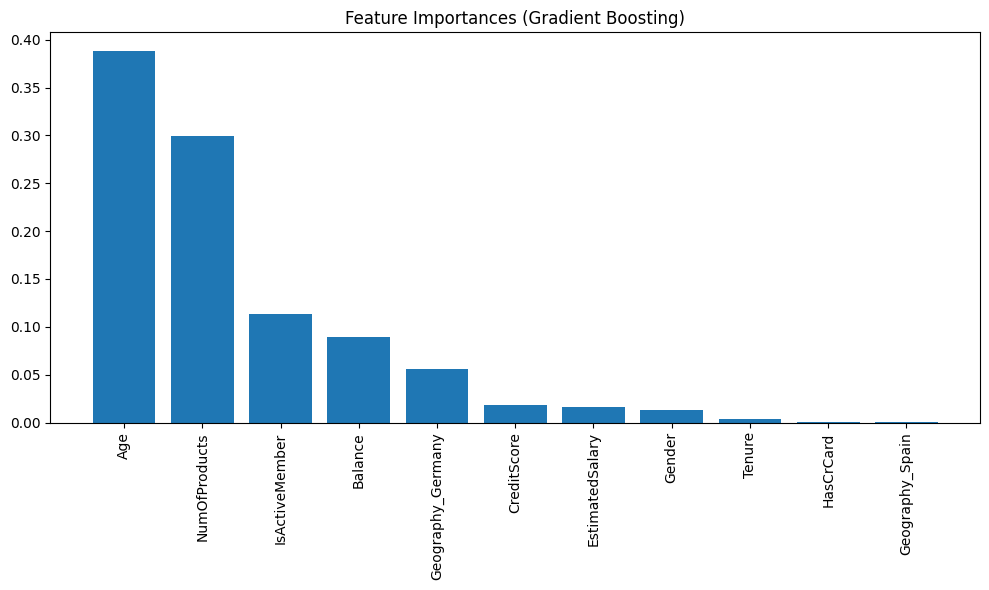

In [64]:
#plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

#  Final Conclusion

This project aimed to develop a reliable machine learning model to predict customer churn for a subscription-based service using historical customer data.

After comparing three models — Logistic Regression, Random Forest, and Gradient Boosting — we found the following:

###  Model Comparison Summary:
| Model                | Accuracy | Recall (Churn) | F1-score (Churn) |
|---------------------|----------|----------------|------------------|
| Logistic Regression | 80.8%    | 0.19           | 0.28             |
| Random Forest       | 86.1%    | 0.45           | 0.57             |
| Gradient Boosting   | **87.0%**| **0.49**       | **0.60**         |

###  Final Choice:
We selected **Gradient Boosting Classifier** as the best model due to its balanced performance in both accuracy and churn detection.

###  Key Takeaways:
- **Gradient Boosting** performs best overall.
- **Age, Geography, Balance**, and **Number of Products** are key drivers of churn.
- Business teams can use this model to identify at-risk customers and take preventive actions.

>  This model can be integrated into a customer retention system to reduce churn and improve customer satisfaction.
